# **NLP Classification model SARCASM**
### Use of NLP techniques for the classification of sarcastic sentences

In [ ]:
# Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import json


In [ ]:
# Set Parameters
vocab_size = 2000
embedding_dim = 150
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
# Corpus
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2022-10-03 13:40:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-10-03 13:40:50 (180 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
#Train/Test Split
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Tokenizing and Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
#word_index

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Con la capa de embedding el modelo aprende la direccion de cada vector

In [ ]:
# Sequential model with a embbeding layer, Pooling layer and Dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Training
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/15
625/625 - 6s - loss: 0.5897 - accuracy: 0.6676 - val_loss: 0.4317 - val_accuracy: 0.8083 - 6s/epoch - 9ms/step
Epoch 2/15
625/625 - 2s - loss: 0.3783 - accuracy: 0.8321 - val_loss: 0.3819 - val_accuracy: 0.8319 - 2s/epoch - 3ms/step
Epoch 3/15
625/625 - 2s - loss: 0.3364 - accuracy: 0.8532 - val_loss: 0.3932 - val_accuracy: 0.8155 - 2s/epoch - 3ms/step
Epoch 4/15
625/625 - 2s - loss: 0.3186 - accuracy: 0.8579 - val_loss: 0.3735 - val_accuracy: 0.8305 - 2s/epoch - 3ms/step
Epoch 5/15
625/625 - 2s - loss: 0.3104 - accuracy: 0.8636 - val_loss: 0.3795 - val_accuracy: 0.8265 - 2s/epoch - 3ms/step
Epoch 6/15
625/625 - 2s - loss: 0.3039 - accuracy: 0.8673 - val_loss: 0.3924 - val_accuracy: 0.8283 - 2s/epoch - 3ms/step
Epoch 7/15
625/625 - 2s - loss: 0.2980 - accuracy: 0.8687 - val_loss: 0.3970 - val_accuracy: 0.8223 - 2s/epoch - 3ms/step
Epoch 8/15
625/625 - 2s - loss: 0.2980 - accuracy: 0.8684 - val_loss: 0.3900 - val_accuracy: 0.8298 - 2s/epoch - 3ms/step
Epoch 9/15
625/625 - 2s 

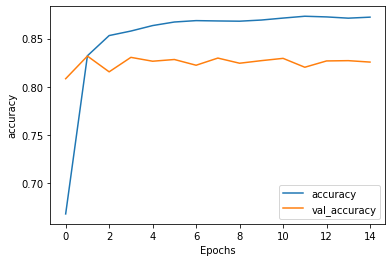

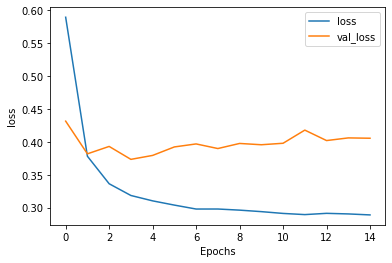

In [ ]:
# Plot results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[4])
print(labels[2])

former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
j.k. rowling wishes snape happy birthday in the most magical way
1


In [ ]:
# Prediction Example
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.33643568]
 [0.03937497]]


## Improving performance

In [ ]:
 # Introducing Bidirectional layer
 model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Training model
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 13s - loss: 0.4105 - accuracy: 0.8052 - val_loss: 0.3561 - val_accuracy: 0.8378 - 13s/epoch - 21ms/step
Epoch 2/10
625/625 - 8s - loss: 0.2999 - accuracy: 0.8684 - val_loss: 0.3542 - val_accuracy: 0.8410 - 8s/epoch - 12ms/step
Epoch 3/10
625/625 - 8s - loss: 0.2569 - accuracy: 0.8909 - val_loss: 0.3595 - val_accuracy: 0.8399 - 8s/epoch - 12ms/step
Epoch 4/10
625/625 - 7s - loss: 0.2263 - accuracy: 0.9045 - val_loss: 0.3644 - val_accuracy: 0.8420 - 7s/epoch - 11ms/step
Epoch 5/10
625/625 - 7s - loss: 0.1988 - accuracy: 0.9168 - val_loss: 0.3881 - val_accuracy: 0.8427 - 7s/epoch - 11ms/step
Epoch 6/10
625/625 - 7s - loss: 0.1703 - accuracy: 0.9315 - val_loss: 0.4589 - val_accuracy: 0.8366 - 7s/epoch - 11ms/step
Epoch 7/10
625/625 - 7s - loss: 0.1466 - accuracy: 0.9421 - val_loss: 0.5125 - val_accuracy: 0.8296 - 7s/epoch - 11ms/step
Epoch 8/10
625/625 - 7s - loss: 0.1210 - accuracy: 0.9517 - val_loss: 0.5877 - val_accuracy: 0.8344 - 7s/epoch - 11ms/step
Epoch 9/10
625

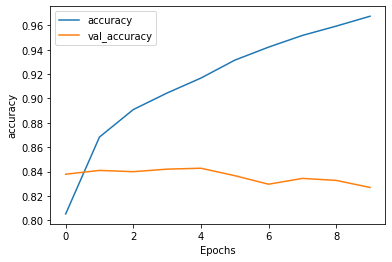

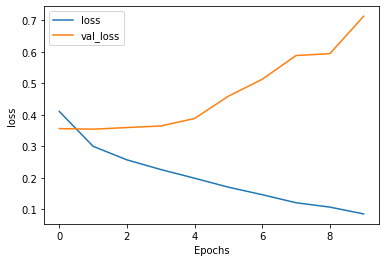

In [ ]:
#Plot results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")